## The dataset

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real homes published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive home in the entire dataset?

Let's start with precisely that question... Good luck!


#### Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [1]:
import pandas as pd

df=pd.read_csv('assets/real_estate.csv',sep=';')
#df.info()
#df.head()
#df.tail()
df.sample(5)

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
7175,7176,153915746,False,nostrum luxury rent sale,911220661.0,https://www.fotocasa.es/es/comprar/vivienda/al...,2.0,1.0,65.0,142800,...,0,0,0,0,0,0,"40,33329","-3,75607",NaN,NaN
4924,4925,148900746,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/me...,4.0,3.0,211.0,243000,...,0,0,0,0,0,0,"40,39742","-3,47776",NaN,NaN
9517,9518,143844434,False,engel volkers madrid,910758015.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,151.0,1700000,...,0,0,0,0,0,0,"40,42051","-3,69107",NaN,NaN
10463,10464,153956962,False,fresno inmobiliaria cobena,914894662.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,314.0,350000,...,0,0,0,0,0,0,"40,6928","-3,51379",NaN,NaN
6327,6328,153941187,False,inmobiliaria de la rosa,912668209.0,https://www.fotocasa.es/es/comprar/vivienda/pa...,2.0,1.0,66.0,130000,...,0,0,0,0,0,0,"40,34797","-3,83064",NaN,NaN


#### What is the most expensive home in the dataset? (★☆☆)

In [12]:
max_expensive_home = df.price.max()
max_index = df.price.idxmax()
print('Most expensive Home : '+str(max_expensive_home)+' index : '+str(max_index))

Most expensive Home : 8500000 index : 13110


#### What is cheapest home in the dataset? (★☆☆)

In [13]:
cheapest_home = df.price.min()
min_index = df.price.idxmin()
print('Cheapest Home : '+str(cheapest_home)+' index : '+str(min_index))

Cheapest Home : 0 index : 366


#### What is the biggest and the smallest home in the dataset? (★☆☆)

In [14]:
biggest_home = df.surface.max()
big_index = df.surface.idxmax()
smaller_home = df.surface.min()
small_index = df.surface.idxmin()
print('The biggest House has a '+str(biggest_home)+' of surface (index : '+str(big_index)+'), and smaller has a '+str(smaller_home)+' of surface  (index : '+str(small_index)+')')

The biggest House has a 249000.0 of surface (index : 6794), and smaller has a 15.0 of surface  (index : 498)


#### How many populations (level5) the dataset contains? (★☆☆)

In [5]:
#population_level5 = df.level5.count()
population_level5 = df.level5.unique().size
print('The population level5 is : '+str(population_level5))

The population level5 is : 168


#### Does the dataset contain NAs? (★☆☆)


In [6]:
#total_dataset_Nas = df.isnull().sum()
total_dataset_Nas = df.isnull().values.any()
print('The dataset cointains : '+str(total_dataset_Nas)+' NAs')

The dataset cointains : True NAs


#### Delete the NAs of the dataset, if applicable (★★☆)

In [7]:
#df.dropna()
if df.isnull().values.any():
    stripped_df = df.dropna()
    print(stripped_df)
else:
    print(df)

Empty DataFrame
Columns: [Unnamed: 0, id_realEstates, isNew, realEstate_name, phone_realEstate, url_inmueble, rooms, bathrooms, surface, price, date, description, address, country, level1, level2, level3, level4, level5, level6, level7, level8, upperLevel, countryId, level1Id, level2Id, level3Id, level4Id, level5Id, level6Id, level7Id, level8Id, accuracy, latitude, longitude, zipCode, customZone]
Index: []

[0 rows x 37 columns]


#### What is the mean of prices in the population (level5) of "Arroyomolinos (Madrid)"? (★★☆)

In [8]:
filter_level5 = df[df['level5'] == "Arroyomolinos (Madrid)"]
print('Mean of prices : '+str(filter_level5['price'].mean()))

Mean of prices : 294541.59854014596


#### Plot the histogram of prices for the population (level5) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

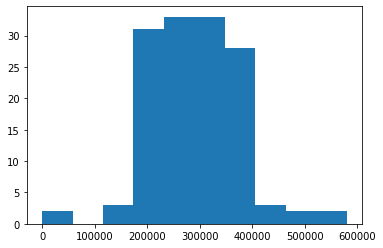

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
filter_level5 = df[df['level5'] == "Arroyomolinos (Madrid)"]
plt.hist(filter_level5['price'])
plt.show()


#### Now let's work with the "south belt" of madrid. Make a subsetting that contains the following populations (level5): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆) 

In [10]:
filter_level5 = df[df['level5'].isin(("Fuenlabrada", "Leganés", "Getafe", "Alcorcón"))]
print(filter_level5)

       Unnamed: 0  id_realEstates  isNew  \
1               2       153867863  False   
3               4       152776331  False   
85             86       153152077  False   
94             95       153995577  False   
109           110       153586414  False   
...           ...             ...    ...   
15275       15276       153903887  False   
15291       15292       151697757  False   
15305       15306       153902389  False   
15322       15323       153871864  False   
15325       15326       153901467  False   

                                 realEstate_name  phone_realEstate  \
1              tecnocasa fuenlabrada ferrocarril       916358736.0   
3              tecnocasa fuenlabrada ferrocarril       916358736.0   
85                       sinergical inmobiliaria               NaN   
94                               viviendas365com       911226014.0   
109              area uno asesores inmobiliarios       912664081.0   
...                                          ...   

#### Make a bar plot of the median of prices (★★★) 

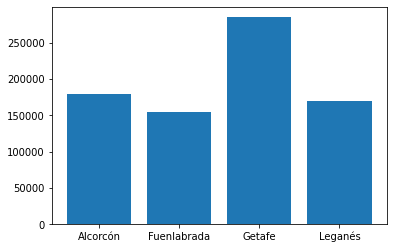

In [11]:

filter_level5 = df[df['level5'].isin(('Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'))]
filtered_data_frame = filter_level5[['level5', 'price']]
grouped_filtered_data_frame = filtered_data_frame.groupby('level5').median()
keys = grouped_filtered_data_frame.index.values.tolist()
values = grouped_filtered_data_frame['price'].tolist()
plt.bar(keys, values)
plt.show()

#### Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (★★★) 

In [16]:
# Calculo media y varianza de las variables de interes para la zona "South Belt" de Madrid

var_interes = ["price","rooms","surface","bathrooms"]

for i in var_interes:
    media = df[i].mean()
    print("Media", i, ":", round(media,1))
    varianza = df[i].var()
    print("Varianza", i, ":", round(varianza,1))

Media price : 477303.6
Varianza price : 349628868677.5
Media rooms : 3.2
Varianza rooms : 1.9
Media surface : 196.9
Varianza surface : 4764433.9
Media bathrooms : 2.2
Varianza bathrooms : 1.7


#### What is the most expensive home of each population? (★★☆) 

In [17]:
print("Precios de las casas más caras por población:")
df.groupby("level5")["price"].max()

Precios de las casas más caras por población:


level5
 Madrid Capital          8000000
Ajalvir                   345000
Alcalá de Henares         850000
Alcobendas               8000000
Alcorcón                  950000
                          ...   
Villar del Olmo           280000
Villarejo de Salvanés     226000
Villaviciosa de Odón     1900000
Villavieja del Lozoya     260000
Zarzalejo                 199000
Name: price, Length: 168, dtype: int64

#### Normalize the variable of prices for each population and plot the 4 histograms in the same plot (★★★) 

In [18]:
# Normalizo la variable precio y creo una nueva variable (price_st)
# La normalizo restando la media y dividiendo por el desvío estándar, de modo que la variable normalizada 
# tenga media 0 y desvío estándar igual a 1

import numpy as np
df["price_st"] = df.groupby(["level5"])["price"].transform(lambda x: (x-np.mean(x))/(np.std(x))) 

df.head()

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone,price_st
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN,-0.155723
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN,-1.289130
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN,-0.859160
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN,-1.289130
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN,-0.419373


In [20]:
# chequeo que la media de la variable precio estandarizada sea 0
df.groupby("level5")["price_st"].mean()

level5
 Madrid Capital         -4.369529e-17
Ajalvir                  1.697988e-16
Alcalá de Henares       -3.658449e-17
Alcobendas               8.144493e-18
Alcorcón                -1.205176e-16
                             ...     
Villar del Olmo          1.903239e-16
Villarejo de Salvanés    3.505967e-17
Villaviciosa de Odón    -1.096847e-16
Villavieja del Lozoya   -1.850372e-17
Zarzalejo                0.000000e+00
Name: price_st, Length: 168, dtype: float64

In [21]:
df.groupby("level5")["price_st"].std()
# chequeo que el desvío de la variable precio estandarizada sea 1

level5
 Madrid Capital          1.000075
Ajalvir                  1.030776
Alcalá de Henares        1.000954
Alcobendas               1.001936
Alcorcón                 1.002642
                           ...   
Villar del Olmo          1.080123
Villarejo de Salvanés    1.027402
Villaviciosa de Odón     1.003026
Villavieja del Lozoya    1.095445
Zarzalejo                1.414214
Name: price_st, Length: 168, dtype: float64

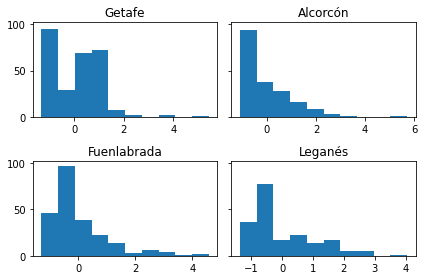

In [23]:
# histograma de las 4 zonas, excluyo las que tienen precio menor a 0

fig, ax = plt.subplots(2, 2, sharey = True)
ax[0, 0].hist(df.loc[(df["level5"]=="Getafe") & (df["price"]>0),"price_st"])
ax[0, 1].hist(df.loc[(df["level5"]=="Alcorcón") & (df["price"]>0),"price_st"])
ax[1, 0].hist(df.loc[(df["level5"]=="Fuenlabrada") & (df["price"]>0),"price_st"])
ax[1, 1].hist(df.loc[(df["level5"]=="Leganés") & (df["price"]>0),"price_st"])
ax[0, 0].set_title('Getafe')
ax[0, 1].set_title('Alcorcón')
ax[1, 0].set_title('Fuenlabrada')
ax[1, 1].set_title('Leganés')
plt.tight_layout() # evita que se superpongan las etiquetas de los ejes con los títulos
plt.show()

#### Make a plot of the coordinates (lat and long) of the south belt of Madrid by color of each population (★★★★) 
This is a extremely hard exercise and we highly recommend to do it at the end of everything

In [24]:
# Run in console the following command before run the rest of code:
# jupyter nbextension enable --py --sys-prefix ipyleaflet

from ipyleaflet import Map, basemaps

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [25]:
# Las variables latitud y longitud tienen coma en vez de punto, cambio esto para poder graficar en mapa

df["latitude"]=df["latitude"].apply(lambda x: x.replace(',','.'))
df["longitude"]=df["longitude"].apply(lambda x: x.replace(',','.'))

# Me quedo solo con las columnas que me interesan

data_sb_selecc = df[["level5", 'latitude', 'longitude']]

# me quedo solo con una línea de cada población para graficar los 4 puntos

data_sb_selecc = data_sb_selecc.drop_duplicates(subset='level5', keep="last")

data_sb_selecc.head()

,level5,latitude,longitude
1009,El Atazar,40.93443,-3.47134
2215,Villamanrique de Tajo,40.0688601989746,-3.24095010757446
4881,Madarcos,41.045904,-3.58190200000001
4888,Puentes Viejas,40.98785,-3.53684
5381,Braojos,41.03811,-3.64268


In [26]:
## HERE: plot the coordinates of the estates

## PUT HERE YOUR CODE:
for name, lon, lat in df[["level5", "longitude", "latitude"]].values:
    marker = Marker(location=(lat, lon), draggable=False, title=name, alt=name)
    map.add_layer(marker)

map.layout.height="600px"

map

NameError: name 'Marker' is not defined

#### What can you say about the price per square meter between the towns of Getafe and Alcorcón?

In [29]:
print("df columns:", df.columns)

df["price_m2"] = df["price"] / df["surface"] 

df columns: Index(['Unnamed: 0', 'id_realEstates', 'isNew', 'realEstate_name',
       'phone_realEstate', 'url_inmueble', 'rooms', 'bathrooms', 'surface',
       'price', 'date', 'description', 'address', 'country', 'level1',
       'level2', 'level3', 'level4', 'level5', 'level6', 'level7', 'level8',
       'upperLevel', 'countryId', 'level1Id', 'level2Id', 'level3Id',
       'level4Id', 'level5Id', 'level6Id', 'level7Id', 'level8Id', 'accuracy',
       'latitude', 'longitude', 'zipCode', 'customZone', 'price_st'],
      dtype='object')


In [31]:
# me quedo con las observaciones que tienen precio >0 
df.loc[(df["level5"]=="Alcorcón") & (df["price"]>0), "price_m2"].describe()

count     173.000000
mean     2239.302480
std       539.951527
min       604.761905
25%      1904.081633
50%      2207.792208
75%      2472.727273
max      3698.159509
Name: price_m2, dtype: float64

In [32]:
print("La media y mediana, medidad de posición central, son menores en Alcorcón que en Getafe. El rango de la variable precio por m2 es mayor en Alcorcón que en Getafe, dado que el precio mínimo de Alcorcón es menor al de Getafe y el precio máximo es mayor al de Getafe. Por su parte, el desvío estándar de la variable es mayor en Getafe que en Alcorcón. También el rango intercuartílico es mayor en Getafe que en Alcorcón, lo que apunta a una mayor dispersión de los datos.")


La media y mediana, medidad de posición central, son menores en Alcorcón que en Getafe. El rango de la variable precio por m2 es mayor en Alcorcón que en Getafe, dado que el precio mínimo de Alcorcón es menor al de Getafe y el precio máximo es mayor al de Getafe. Por su parte, el desvío estándar de la variable es mayor en Getafe que en Alcorcón. También el rango intercuartílico es mayor en Getafe que en Alcorcón, lo que apunta a una mayor dispersión de los datos.


#### Reload the data, is the average of "Valdemorillo" and "Galapagar" prices the same?

In [34]:
vald = df.loc[df["level5"]=="Valdemorillo","price"].mean()
galap = df.loc[df["level5"]=="Galapagar","price"].mean()

print("Precio promedio de Valdemorillo:", round(vald,2))
print("Precio promedio de Galapagar:", round(galap,2))
print("Diferencial porcentual entre los precios:", round(((vald/galap)-1)*100,2), "%")

# Son muy similares, el de Valdemorrillo levemente inferior

print("La media de los precios de las dos poblaciones es muy similar, la media de Valdemorrillo es",round(((vald/galap)-1)*100,2),"% superior.")

Precio promedio de Valdemorillo: 363860.29
Precio promedio de Galapagar: 360063.2
Diferencial porcentual entre los precios: 1.05 %
La media de los precios de las dos poblaciones es muy similar, la media de Valdemorrillo es 1.05 % superior.


#### What happens if we do the same analysis for price/m2 (★★☆) 

In [36]:
df["price_m2"] = df["price"] / df["surface"]

vald = df.loc[df["level5"]=="Valdemorillo","price_m2"].mean()
galap = df.loc[df["level5"]=="Galapagar","price_m2"].mean()

print("Precio por m2 promedio de Valdemorillo:", round(vald,2))
print("Precio por m2 promedio de Galapagar:", round(galap,2))

print("Diferencial porcentual entre los precios:", round(((vald/galap)-1)*100,2), "%")

print("La diferencia entre las dos zonas es superior si se considera el precio/m2. El precio por m2 promedio en Valdemorrillo es",round(((vald/galap)-1)*100,2),"% inferior.")

Precio por m2 promedio de Valdemorillo: 1317.95
Precio por m2 promedio de Galapagar: 1606.32
Diferencial porcentual entre los precios: -17.95 %
La diferencia entre las dos zonas es superior si se considera el precio/m2. El precio por m2 promedio en Valdemorrillo es -17.95 % inferior.


#### Could you say there is a relation between surface and price? (★★☆) 
Hint: make a scatter plot.

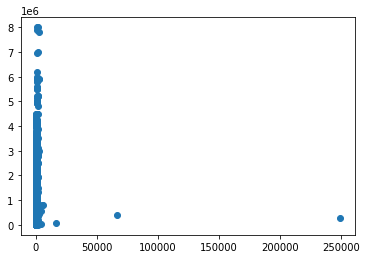

Hay casas con superficie muy elevada, mayor a 50000 m2. Esto distorsiona el gráfico y no permite sacar conclusiones relevantes sobre la relación entre la superficie y el precio.


In [38]:
fig, ax = plt.subplots()
ax.scatter(df["surface"], df["price"])
plt.show()

print("Hay casas con superficie muy elevada, mayor a 50000 m2. Esto distorsiona el gráfico y no permite sacar conclusiones relevantes sobre la relación entre la superficie y el precio.")


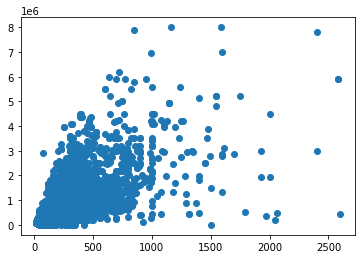

Al excluir las observaciones con superficie mayor a 3000 m2, se puede observar que existe una relación positiva entre el precio y la superficie.


In [41]:
# Filtro las observaciones y grafico aquellas que tienen superficie mayor a 3000 m2 de modo que se pueda visualizar mejor la relación entre el precio y la superficie
fig, ax = plt.subplots()
ax.scatter(df.loc[df["surface"]<3000, "surface"], df.loc[df["surface"]<3000, "price"])
plt.show()

print("Al excluir las observaciones con superficie mayor a 3000 m2, se puede observar que existe una relación positiva entre el precio y la superficie.")


#### Make the same plot for 4 different populations (level5) and rearrange them on the same graph? (★★☆) 
Hint: make a scatter plot of each population using subplots.

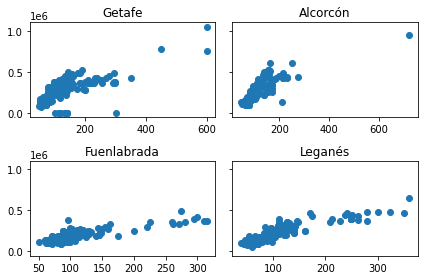

In [42]:
# En este caso también grafico únicamente aquellas observaciones con superficie menor a 3000 m2.

fig, ax = plt.subplots(2, 2, sharey = True)
ax[0, 0].scatter(df.loc[(df["level5"]=="Getafe") & (df["surface"]<3000),"surface"], df.loc[(df["level5"]=="Getafe") & (df["surface"]<3000),"price"])
ax[0, 1].scatter(df.loc[(df["level5"]=="Alcorcón") & (df["surface"]<3000),"surface"], df.loc[(df["level5"]=="Alcorcón") & (df["surface"]<3000),"price"])
ax[1, 0].scatter(df.loc[(df["level5"]=="Fuenlabrada") & (df["surface"]<3000),"surface"], df.loc[(df["level5"]=="Fuenlabrada") & (df["surface"]<3000),"price"])
ax[1, 1].scatter(df.loc[(df["level5"]=="Leganés") & (df["surface"]<3000),"surface"], df.loc[(df["level5"]=="Leganés") & (df["surface"]<3000),"price"])
ax[0, 0].set_title('Getafe')
ax[0, 1].set_title('Alcorcón')
ax[1, 0].set_title('Fuenlabrada')
ax[1, 1].set_title('Leganés')
plt.tight_layout()
plt.show()

#### How many  real estate agencies the dataset contains? (★★☆) 

In [43]:
print(print(df["realEstate_name"].value_counts()))

print("El dataset contiene", len(df["realEstate_name"].value_counts()), "real estate agencies.")

engel volkers madrid    470
infocasa consulting     300
outletdeviviendas       260
housell                 250
solvia inmobiliaria     207
                       ... 
javier garcia             1
ir inmobiliaria           1
jesus                     1
julio                     1
nieves                    1
Name: realEstate_name, Length: 1821, dtype: int64
None
El dataset contiene 1821 real estate agencies.


#### What is the population (level 5) that contains the most houses? (★★☆) 

In [44]:
print(df["level5"].value_counts())

print("Madrid Capital es la zona que contiene mayor cantidad de casas.")

 Madrid Capital         6643
Alcalá de Henares        525
Las Rozas de Madrid      383
Móstoles                 325
Getafe                   290
                        ... 
Brea de Tajo               1
El Atazar                  1
Piñuécar-gandullas         1
Braojos                    1
Montejo de la Sierra       1
Name: level5, Length: 168, dtype: int64
Madrid Capital es la zona que contiene mayor cantidad de casas.
